In [1]:
import pandas as pd
import numpy as np
import scipy.stats as s

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline

In [2]:
# Read in Data
player_data = pd.read_pickle('player_stats.pkl')

In [3]:
player_data.describe()

,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,STL,BLK,TOV,PF,PTS,ORtg,DRtg,Season,Class,Height
count,23868.000000,23867.000000,23868.000000,23744.000000,23744.000000,23213.000000,23744.000000,23744.000000,22664.000000,23744.000000,...,23744.000000,23744.000000,23744.000000,23744.000000,23744.000000,23744.000000,23743.000000,23868.000000,23311.000000,23311.000000
mean,24.359770,12.016592,485.537791,6.331006,15.279127,0.418676,4.583137,9.684990,0.464958,1.747545,...,1.704443,1.018299,3.668341,6.286965,18.020873,97.885441,104.543524,2015.999623,2.455965,76.819828
std,10.496075,12.947851,369.624537,3.362839,6.736971,0.147956,3.206025,5.718717,0.166545,2.063585,...,1.856055,1.516546,3.061034,4.307453,8.962277,29.091651,7.475937,1.412924,1.115557,3.518153
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-56.000000,2014.000000,1.000000,62.000000
25%,17.000000,0.000000,123.000000,4.400000,11.300000,0.363000,2.400000,6.000000,0.405000,0.000000,...,0.900000,0.000000,2.500000,4.200000,12.700000,89.800000,100.400000,2015.000000,1.000000,74.000000
50%,29.000000,6.000000,459.000000,6.300000,15.100000,0.424000,4.300000,9.300000,0.478000,1.300000,...,1.500000,0.500000,3.400000,5.600000,17.900000,102.100000,104.800000,2016.000000,2.000000,77.000000
75%,32.000000,25.000000,805.000000,8.200000,18.800000,0.492000,6.300000,12.900000,0.541000,2.900000,...,2.200000,1.400000,4.500000,7.700000,23.200000,111.600000,109.200000,2017.000000,3.000000,80.000000
max,41.000000,41.000000,1474.000000,63.400000,126.800000,1.000000,63.400000,126.800000,1.000000,56.700000,...,64.800000,59.500000,171.300000,245.500000,170.100000,300.000000,129.200000,2018.000000,4.000000,91.000000


In [4]:
player_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23868 entries, 0 to 23867
Data columns (total 30 columns):
Player    23868 non-null object
G         23868 non-null int64
GS        23867 non-null float64
MP        23868 non-null int64
FG        23744 non-null float64
FGA       23744 non-null float64
FG%       23213 non-null float64
2P        23744 non-null float64
2PA       23744 non-null float64
2P%       22664 non-null float64
3P        23744 non-null float64
3PA       23744 non-null float64
3P%       19224 non-null float64
FT        23744 non-null float64
FTA       23744 non-null float64
FT%       21444 non-null float64
TRB       23744 non-null float64
AST       23744 non-null float64
STL       23744 non-null float64
BLK       23744 non-null float64
TOV       23744 non-null float64
PF        23744 non-null float64
PTS       23744 non-null float64
ORtg      23744 non-null float64
DRtg      23743 non-null float64
Team      23868 non-null object
Season    23868 non-null int64
Class   

In [5]:
player_data.head()

,Player,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,...,TOV,PF,PTS,ORtg,DRtg,Team,Season,Class,Pos,Height
0,Julian Edmonson,30,5.0,568,10.5,26.2,0.401,6.2,15.2,0.411,...,5.6,6.6,34.5,102.3,107.9,abilene-christian,2014,3.0,G,73.0
1,Jacob Lancaster,31,11.0,434,12.0,21.7,0.553,11.8,21.5,0.551,...,5.6,6.7,29.1,102.9,99.3,abilene-christian,2014,3.0,F,82.0
2,Parker Wentz,31,29.0,1040,7.7,15.7,0.491,3.2,5.6,0.576,...,3.4,4.0,24.5,124.7,107.5,abilene-christian,2014,2.0,G,69.0
3,LaDarrien Williams,16,14.0,474,8.1,21.8,0.371,6.4,16.3,0.389,...,4.2,5.2,24.4,101.2,104.1,abilene-christian,2014,3.0,G,72.0
4,Harrison Hawkins,16,16.0,481,6.8,18.1,0.374,3.7,10.4,0.353,...,6.0,5.8,24.1,100.9,108.5,abilene-christian,2014,3.0,G,72.0


In [6]:
# _ = scatter_matrix(player_data, alpha=0.2, figsize=(15, 15));

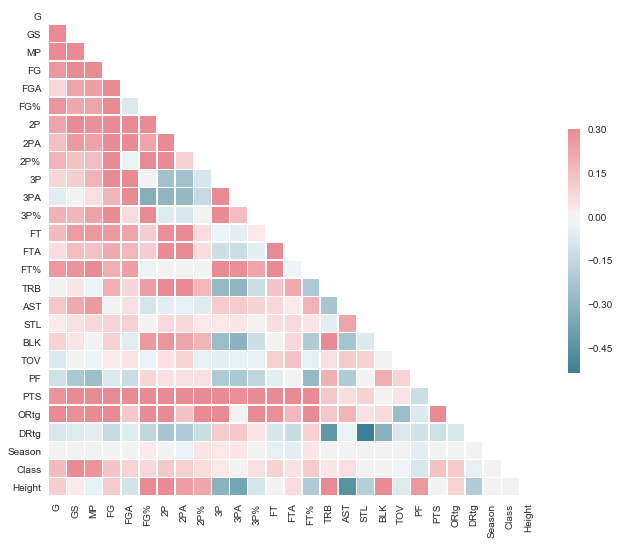

In [7]:
sns.set(style="white")

# Compute the correlation matrix
corr = player_data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

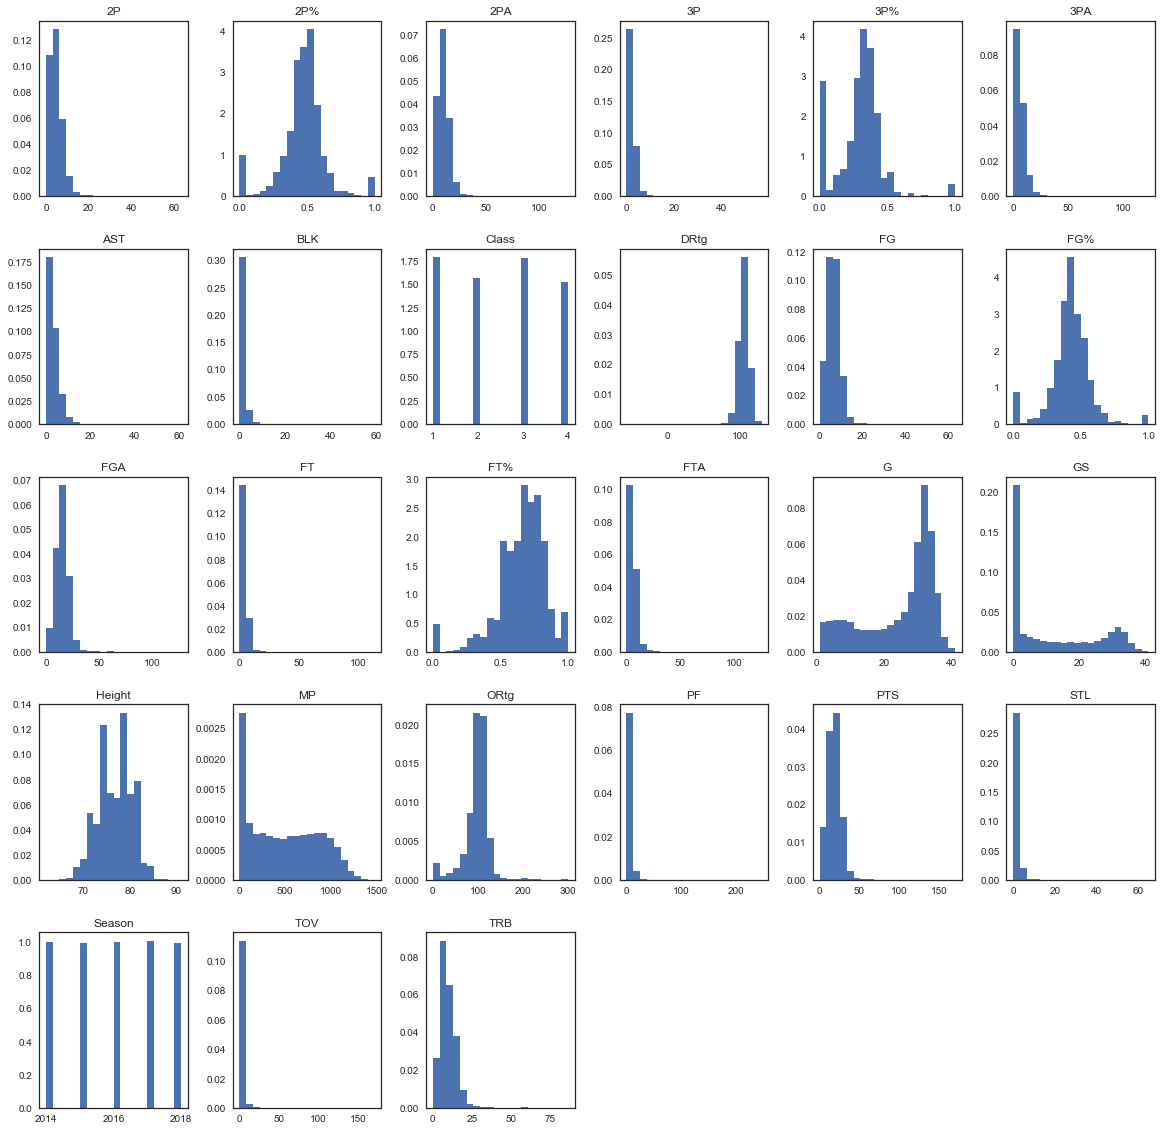

In [9]:
features = player_data.columns.tolist()
axes = player_data[features].hist(bins=20, density=1,
                grid=0, edgecolor='none',
                figsize=(20, 20),
                layout=(5,6))

for ax in axes.flatten():
    ax